## CFD with high-performance Python progamming course

### Step 0: Introduction to CFD

Navier-Stokes Equations for Incompressible Flow:
- Momentum equation: $ \frac{\partial \mathbf{u}}{\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} = -\frac{1}{\rho} \nabla p + \nu \nabla^2 \mathbf{u} + \mathbf{f} $

- Continuity equation: $ \nabla \cdot \mathbf{u} = 0 $

Where:

- $ \mathbf{u} $ = velocity field,

- $ t $ = time,

- $ \rho $ = fluid density,

- $ p $ = pressure field,

- $ \nu $ = kinematic viscosity,

- $ \mathbf{f} $ = body forces (e.g., gravity),

- $ \nabla $ = gradient operator,

- $ \nabla^2 $ = Laplacian operator.

### Step 1: 1D Linear Convection

$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $

Initial Condition: $ u(x, 0) = u_0 (x) $
Exact solution: $ u(x, t) = u_0(x - ct) $

Discretize the equation using Forward Difference in time (in discrete time intervals of size $ \Delta t $) and Backward Difference in space (from i = 0 to N).

$ \frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $

Where, the only unknown is $ u_i^{n+1} $. Hence, rearranging, we have:

$ u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) $

In [15]:
#Import required libraries
import numpy as np 
import matplotlib.pyplot as plt
import time, sys

#For plots to appear in the notebook rather than a separate window
%matplotlib inline

In [16]:
#Define variables
nx = 61
dx = 2 / (nx - 1) #delta x
nt = 20 #no of time steps
dt = 0.025 #delta t
c = 1 #wavespeed

#Define initial conditions
u = np.ones(nx) #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2 #setting u = 2 between 0.5 and 1 as per our I.C.s
# int() truncates the decimal part

#print(u)
print(np.linspace(0, 2, nx))

[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.         1.03333333 1.06666667 1.1        1.13333333 1.16666667
 1.2        1.23333333 1.26666667 1.3        1.33333333 1.36666667
 1.4        1.43333333 1.46666667 1.5        1.53333333 1.56666667
 1.6        1.63333333 1.66666667 1.7        1.73333333 1.76666667
 1.8        1.83333333 1.86666667 1.9        1.93333333 1.96666667
 2.        ]


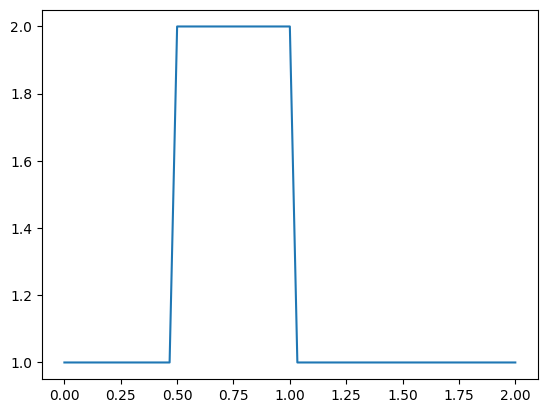

In [18]:
plt.plot(np.linspace(0, 2, nx), u);

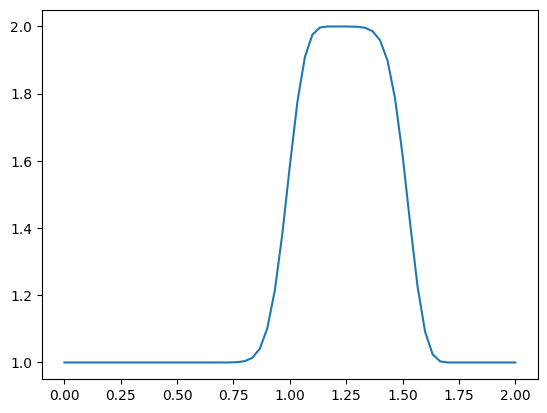

In [19]:
un = np.ones(nx) # initialize a temporary array

for n in range(nt): # loop n from 0 to nt-1, so it will run nt times
    un = u.copy() # copy the existing values of u into un
    for i in range(1, nx): # change the range to 0 to nx, and see what happens
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

plt.plot(np.linspace(0, 2, nx), u);

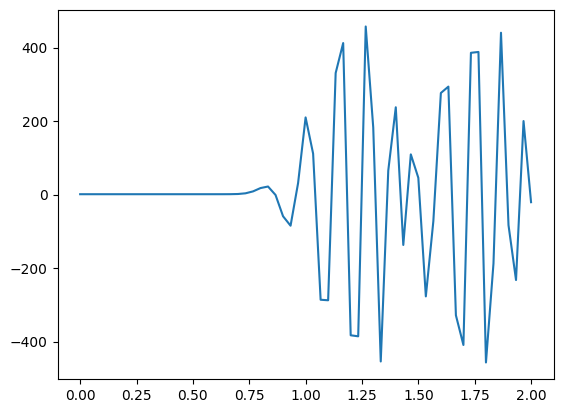

In [20]:
c = -1

un = np.ones(nx) # initialize a temporary array

for n in range(nt): # loop n from 0 to nt-1, so it will run nt times
    un = u.copy() # copy the existing values of u into un
    for i in range(1, nx): # change the range to 0 to nx, and see what happens
        u[i] = un[i] - c * dt / dx * (un[i]-un[i-1])
plt.plot(np.linspace(0, 2, nx), u);

### Step 2: Nonlinear Convection and Upwind Scheme

We create the initial condition $ u_0 $ by initializing the array for the solution using $ u = 2,  0.5 \leq x \leq 1 $ and $ u = 1 $ everywhere else in $ (0, 2) $ (i.e., a hat function).

In [21]:
nx = 141
dx = 2 / (nx - 1)
nt = 20    #nt is the number of timesteps we want to calculate
#dt = .025  #dt is the amount of time each timestep covers (delta t)

u = np.ones(nx)                         #as before, we initialize u with every value equal to 1.
u[:]= 1
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

CFL = 0.9
dt = CFL * dx / max(abs(u))

un = np.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

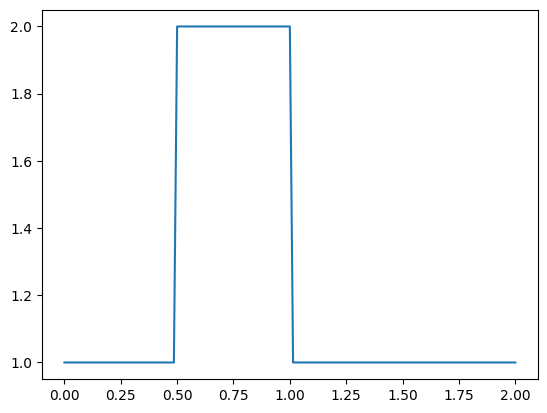

In [22]:
plt.plot(np.linspace(0, 2, nx), u);
plt.show()

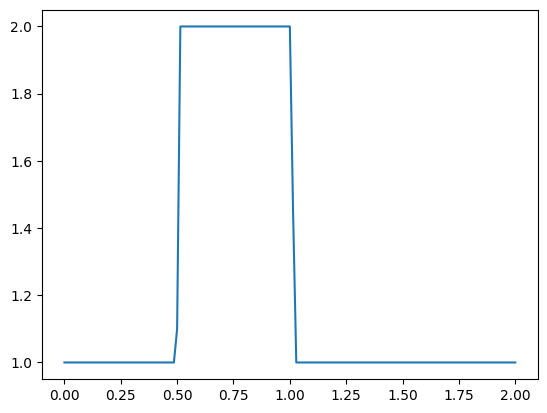

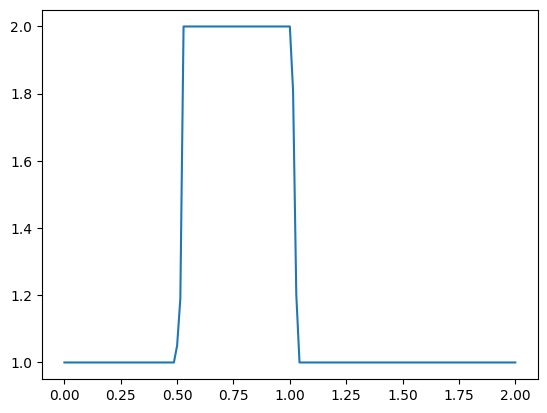

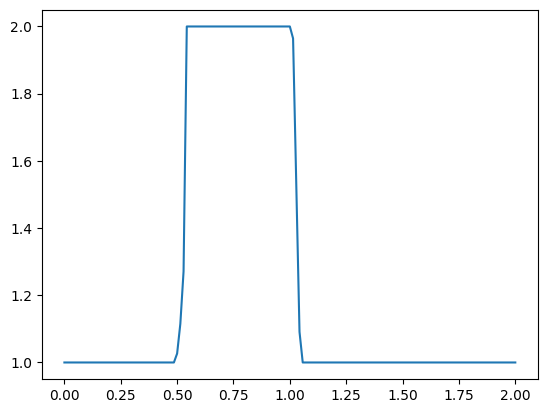

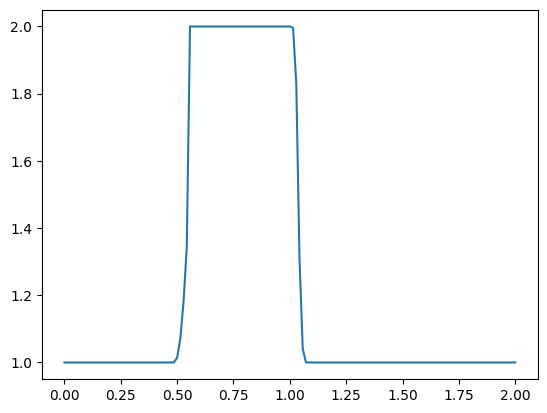

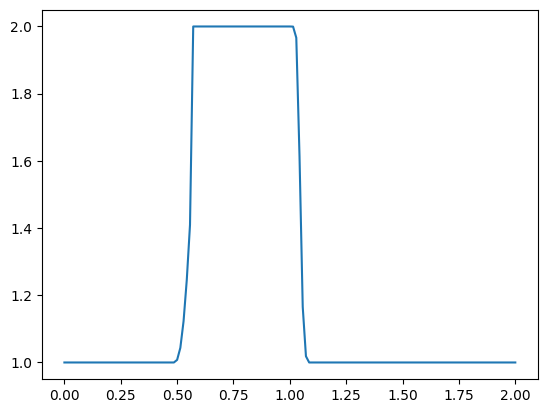

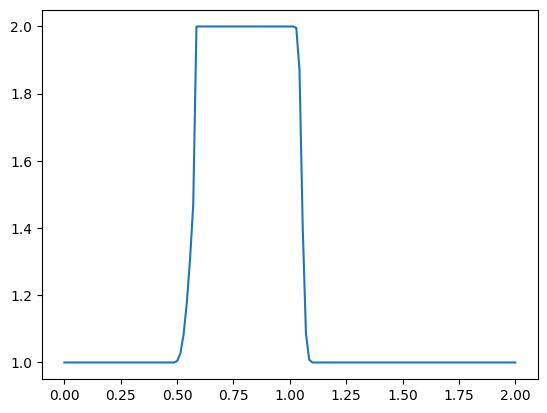

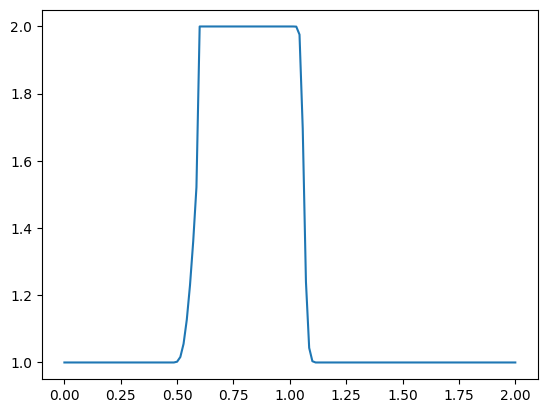

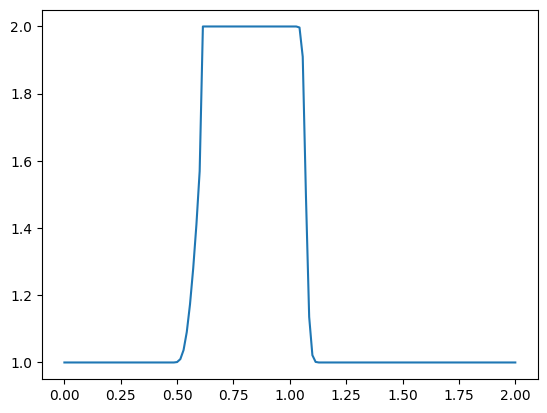

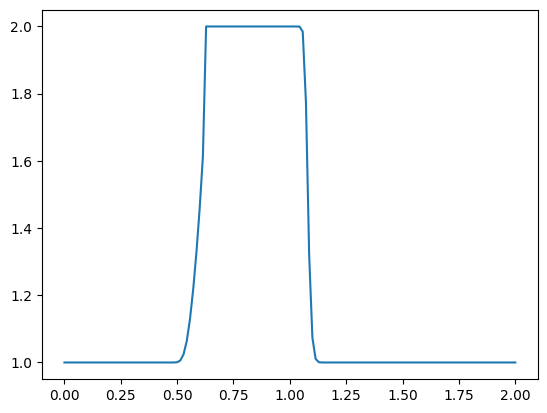

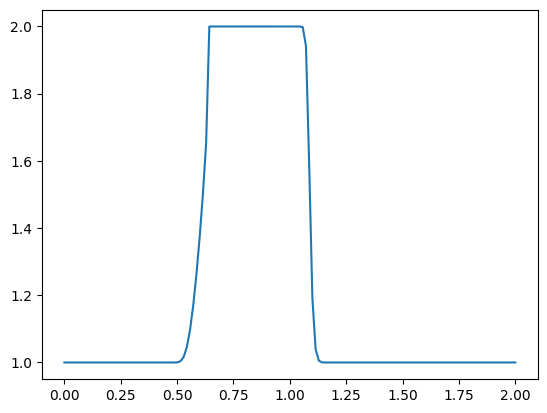

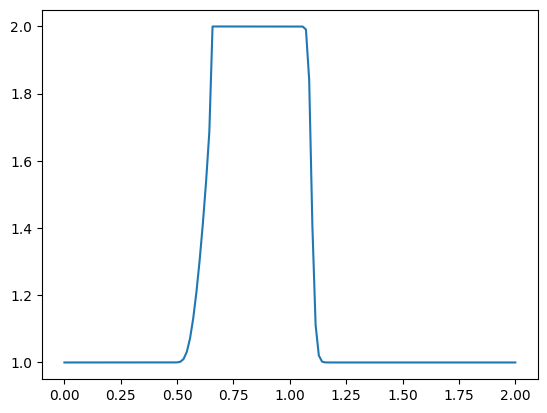

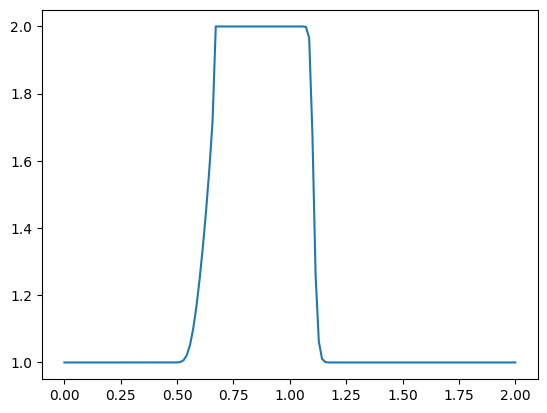

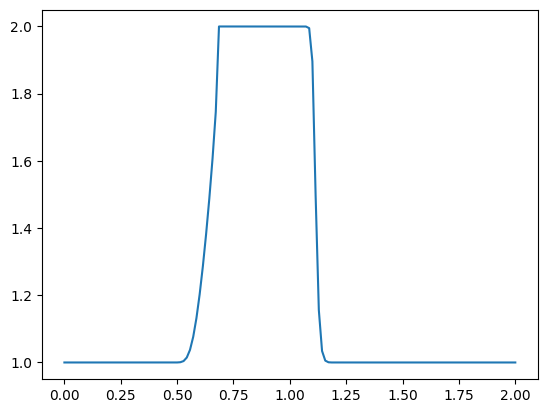

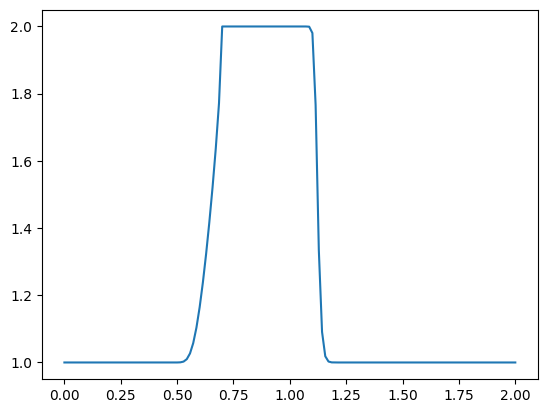

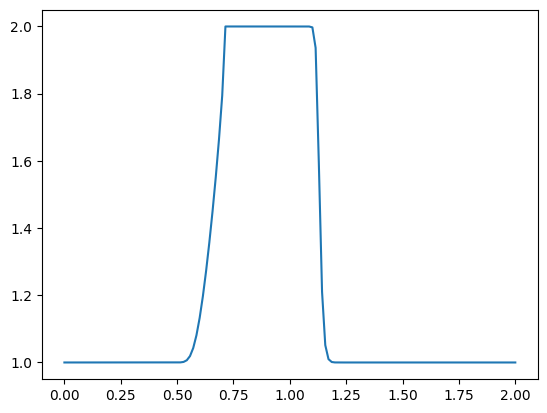

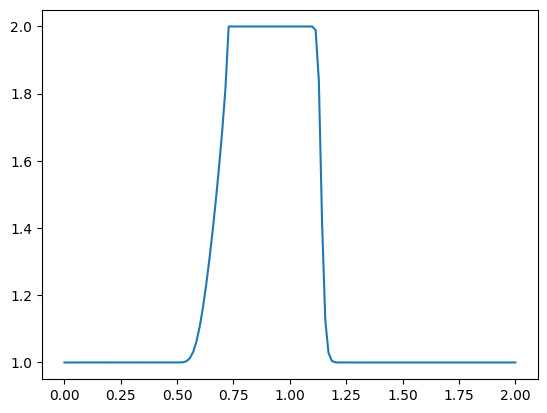

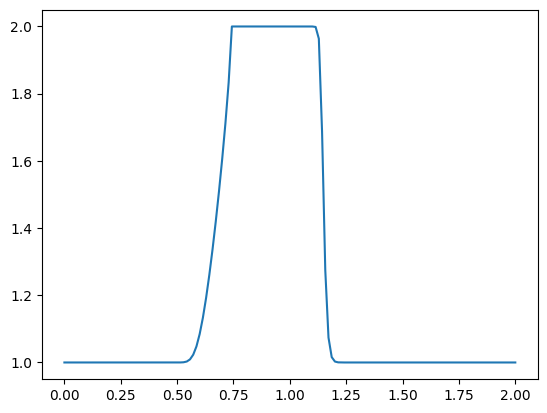

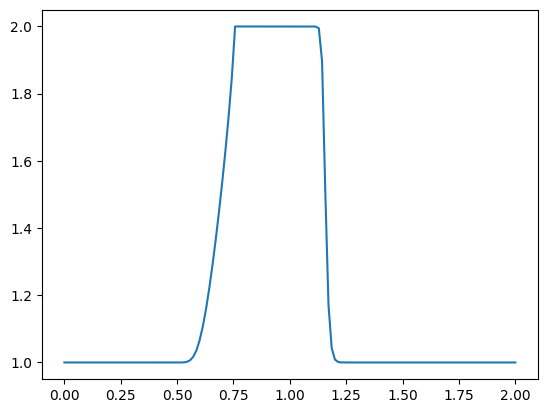

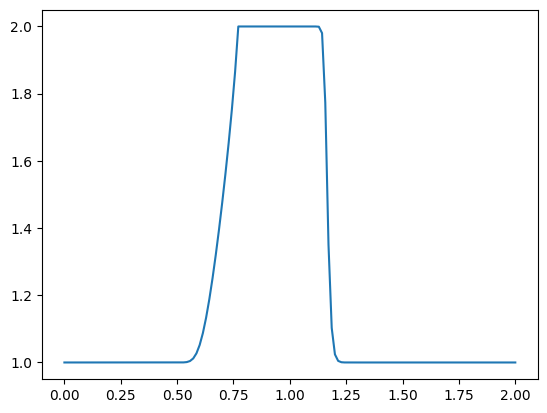

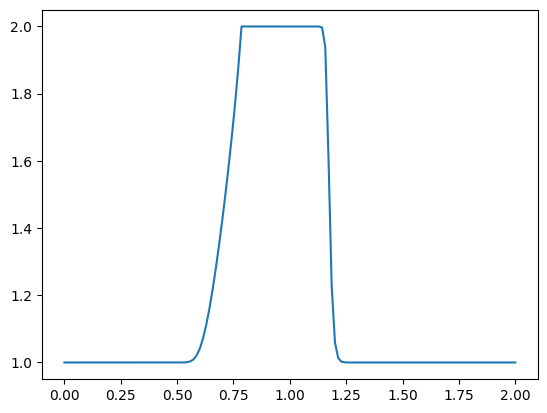

In [23]:
# To execute the nonlinear convection:

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    

    for i in range(1, nx-1):  ##now we'll iterate through the u array
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])        
    plt.plot(np.linspace(0, 2, nx), u) ##Plot the results
    plt.show()

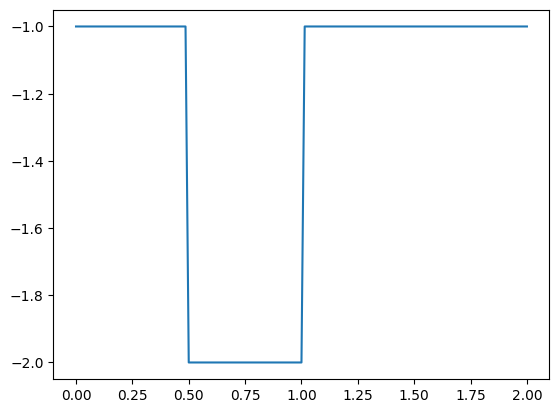

In [24]:
# If we switch the initial values from +ve to -ve

u[:]= -1
u[int(.5 / dx) : int(1 / dx + 1)] = -2  #then set u = 2 between 0.5 and 1 as per our I.C.s

plt.plot(np.linspace(0, 2, nx), u);
plt.show()

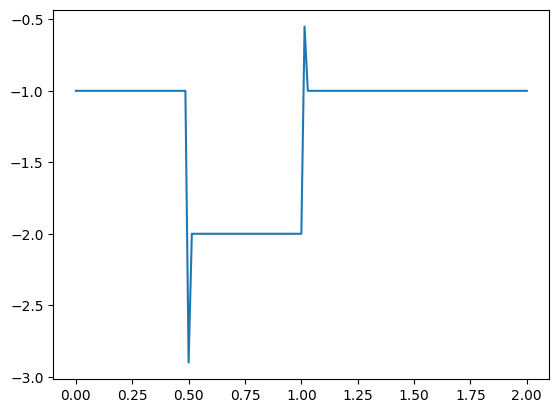

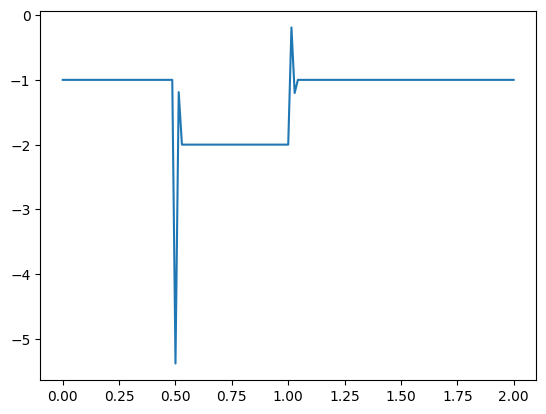

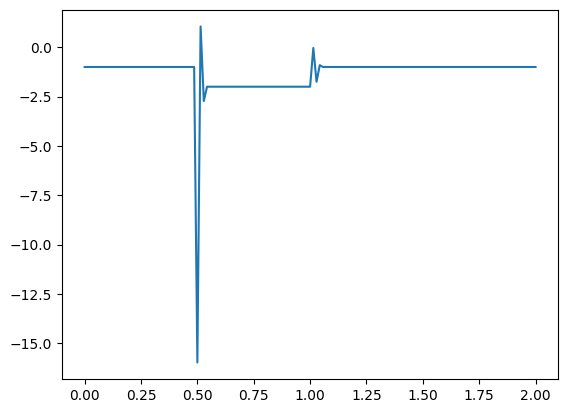

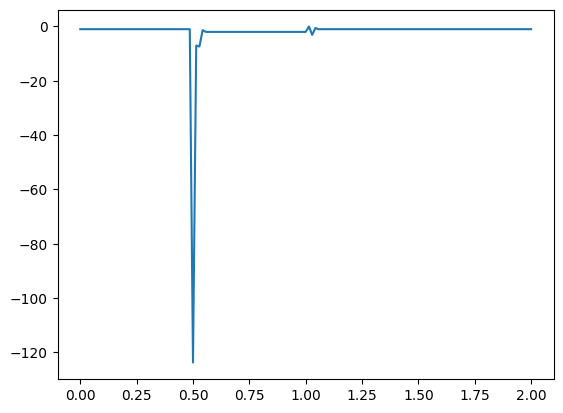

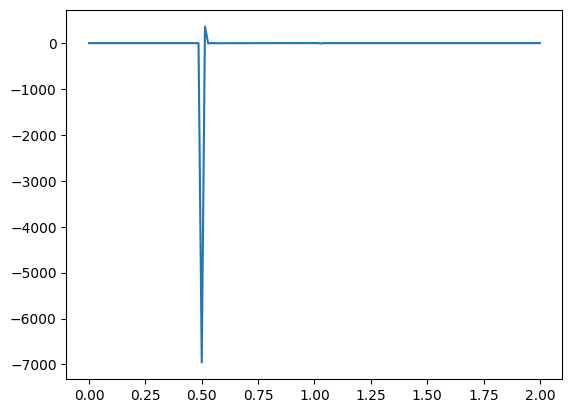

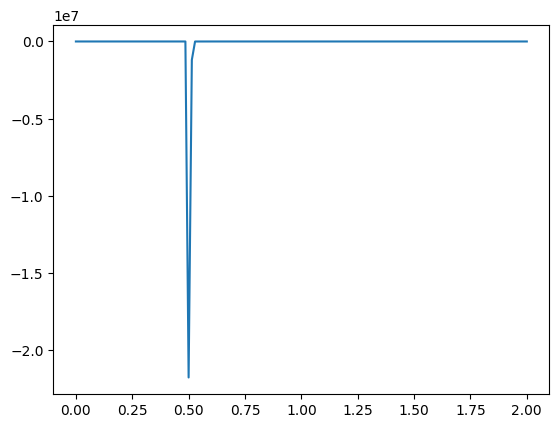

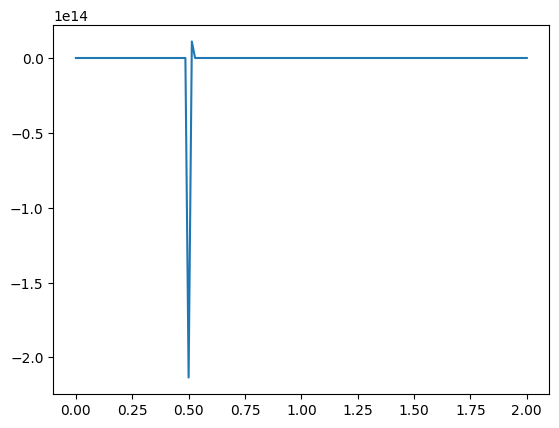

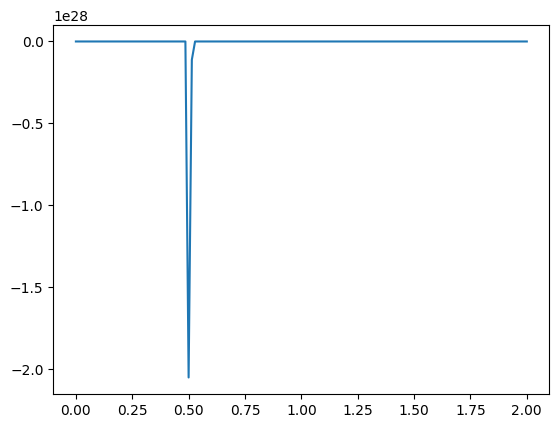

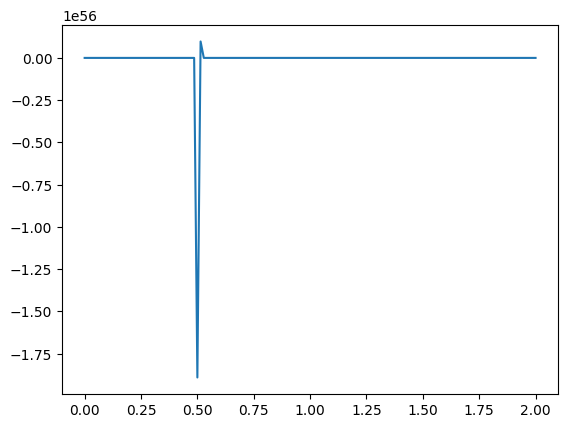

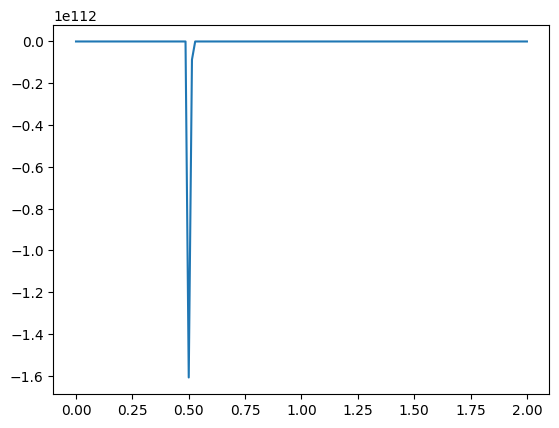

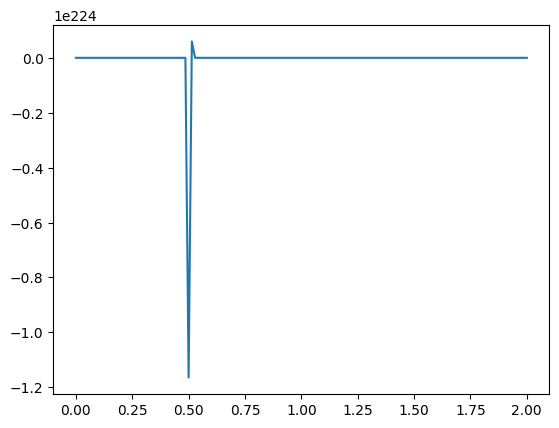

C:\Users\alyss\AppData\Local\Temp/ipykernel_12368/2793021359.py:6: RuntimeWarning: overflow encountered in scalar multiply
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


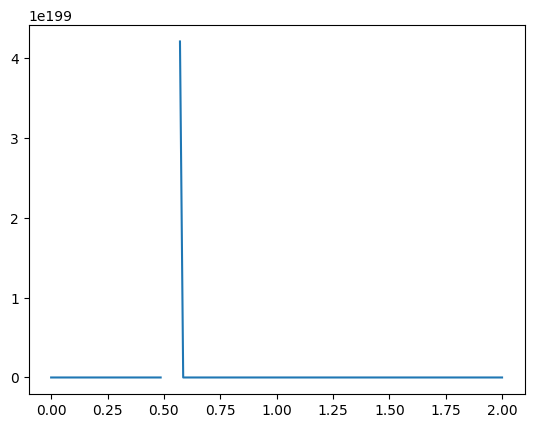

C:\Users\alyss\AppData\Local\Temp/ipykernel_12368/2793021359.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])


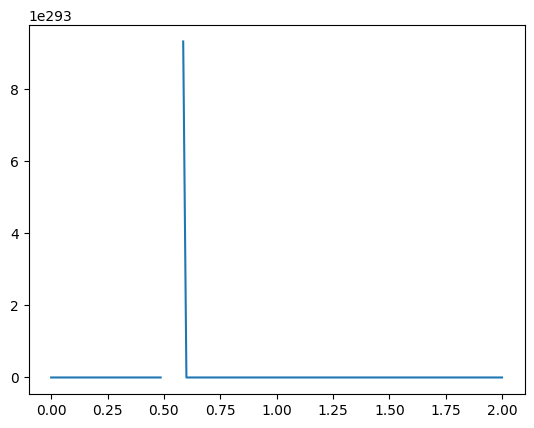

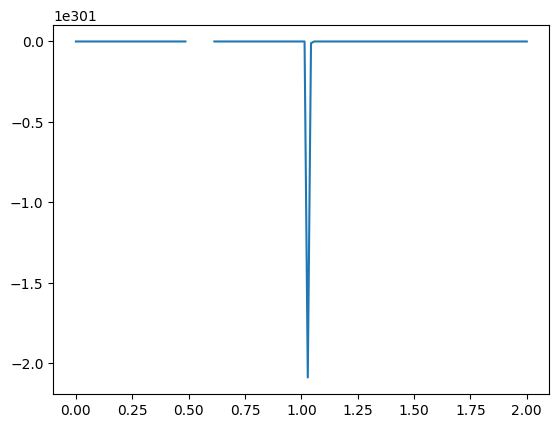

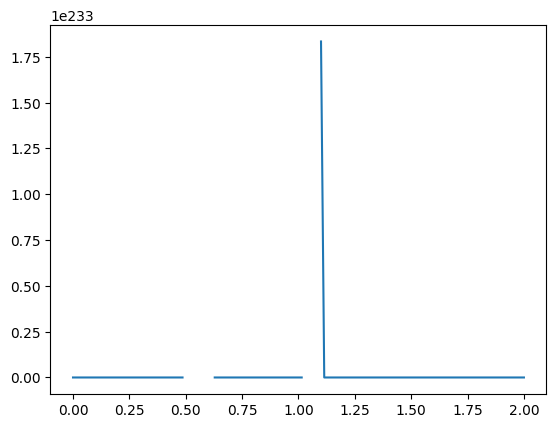

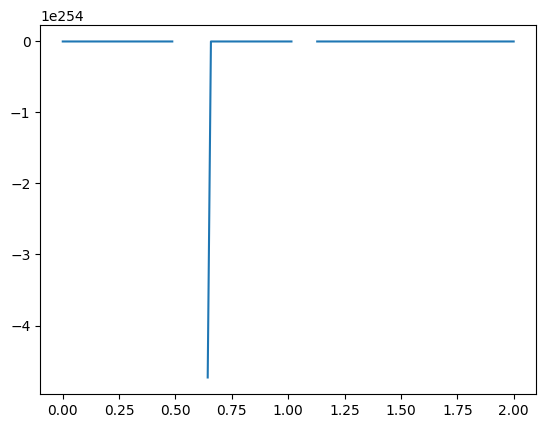

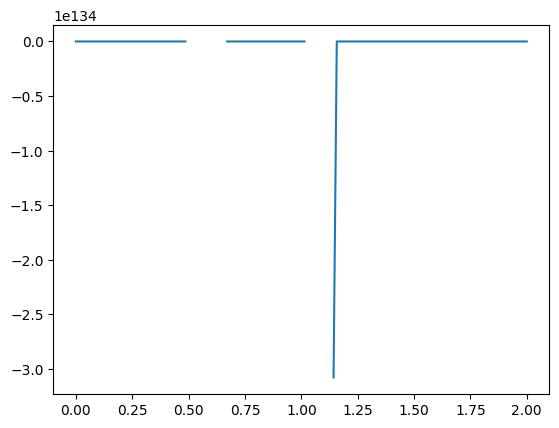

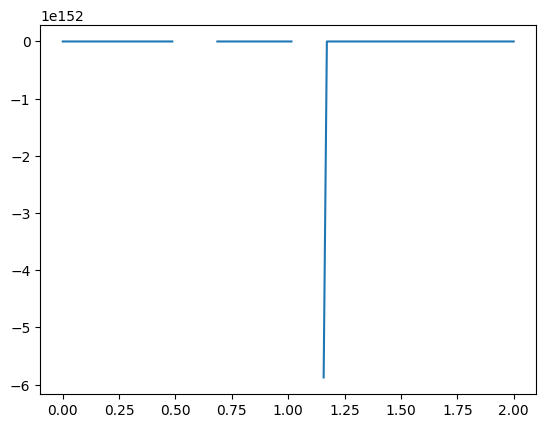

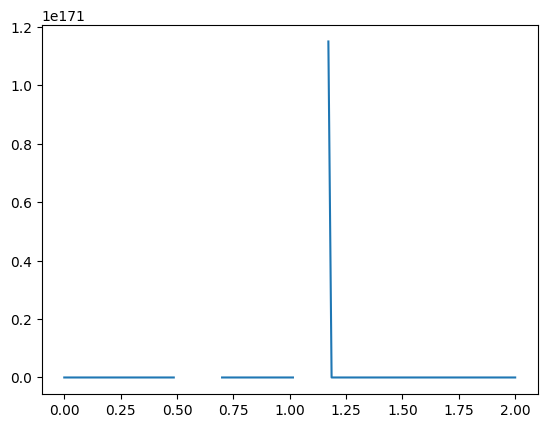

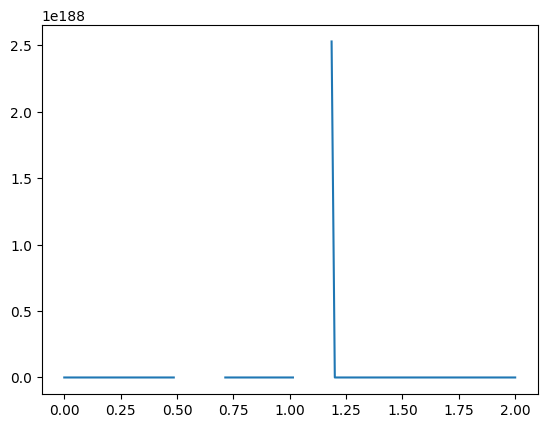

In [25]:
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    

    for i in range(1, nx-1):  ##now we'll iterate through the u array
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])        
    plt.plot(np.linspace(0, 2, nx), u) ##Plot the results
    plt.show()

##### Upwind Scheme

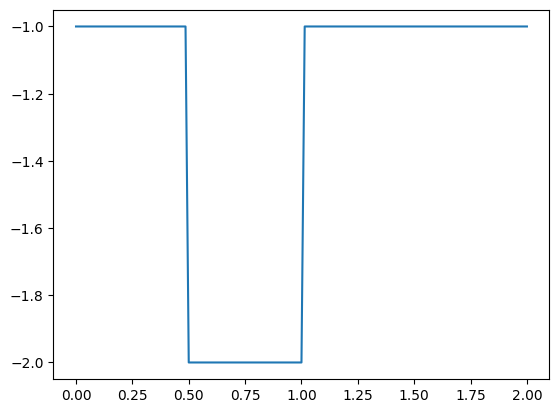

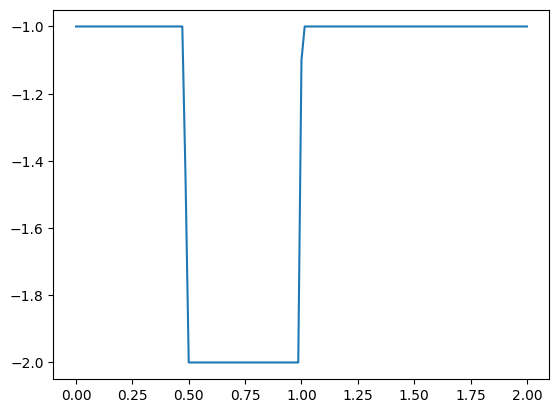

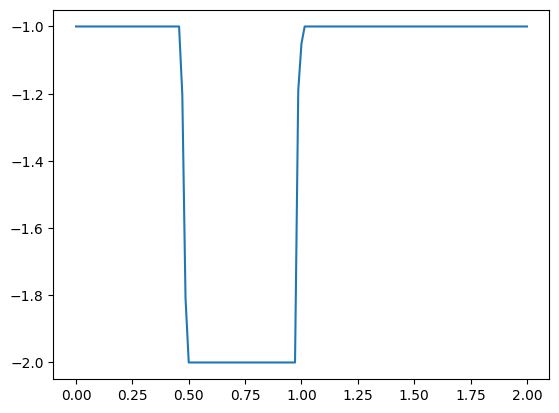

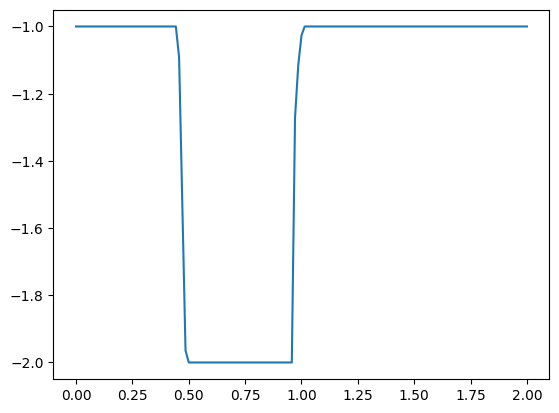

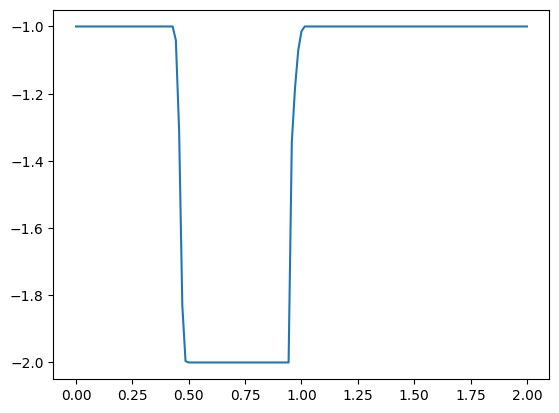

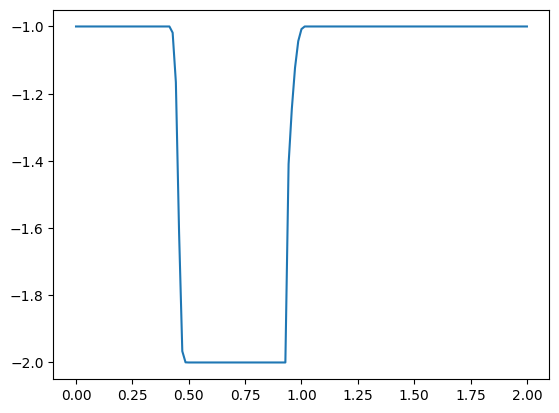

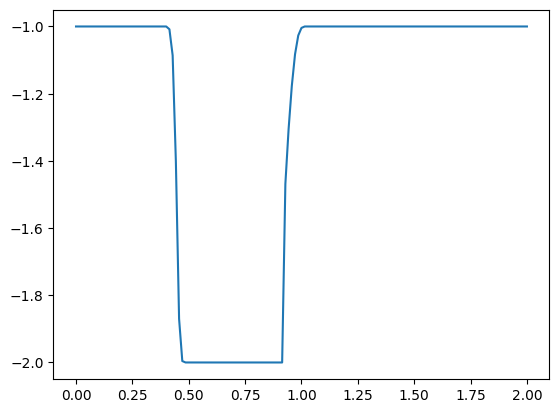

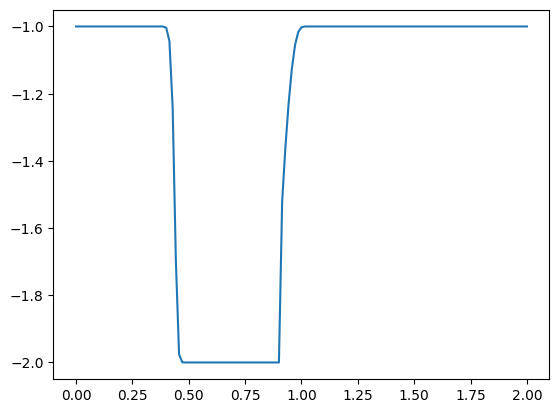

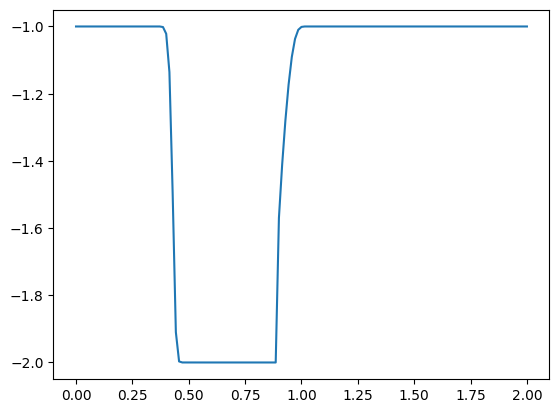

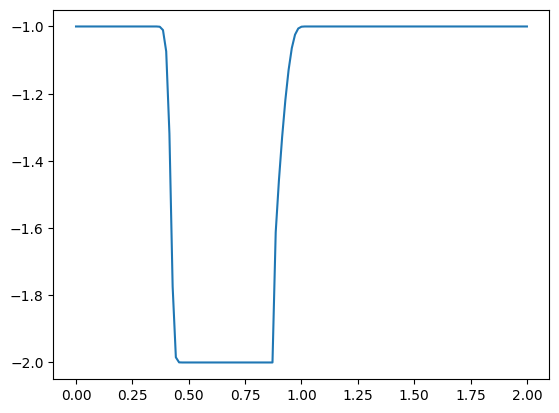

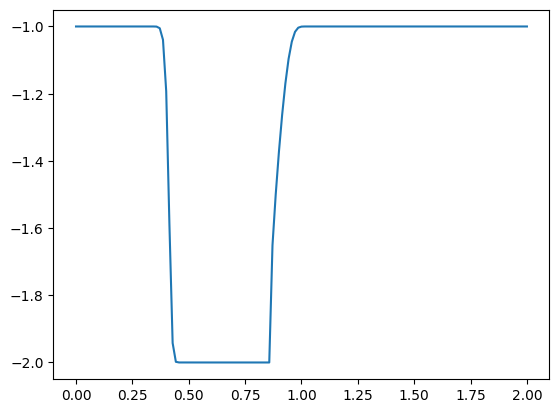

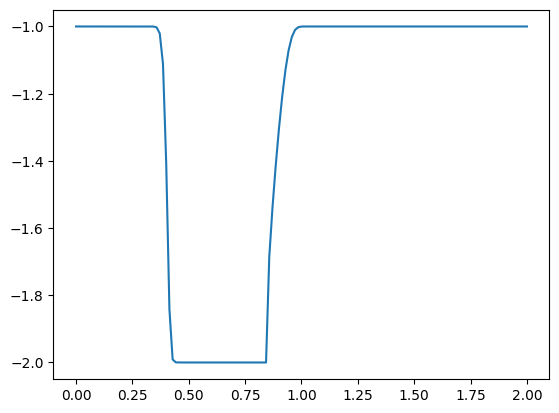

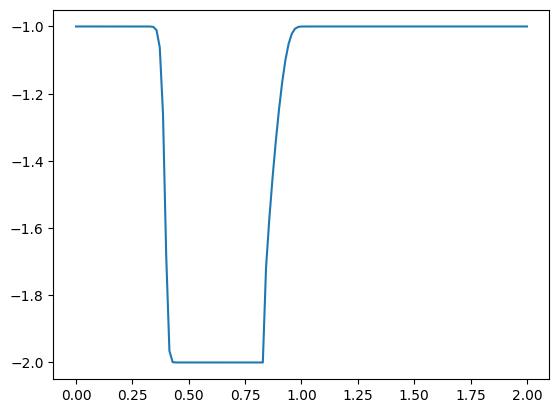

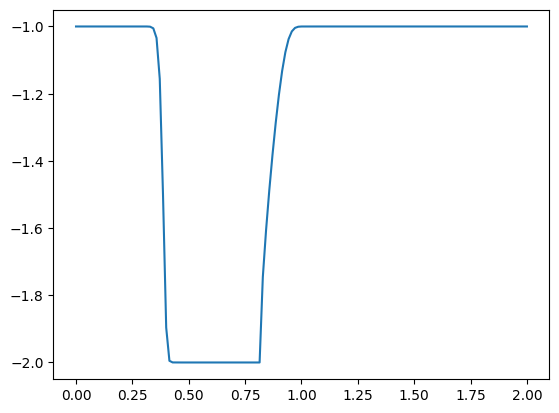

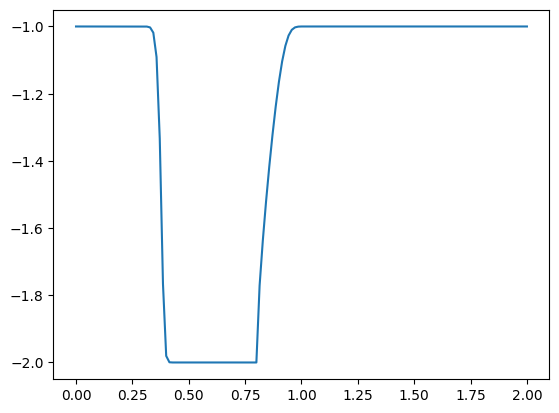

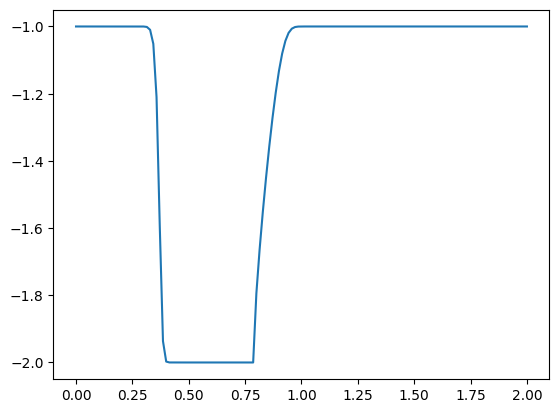

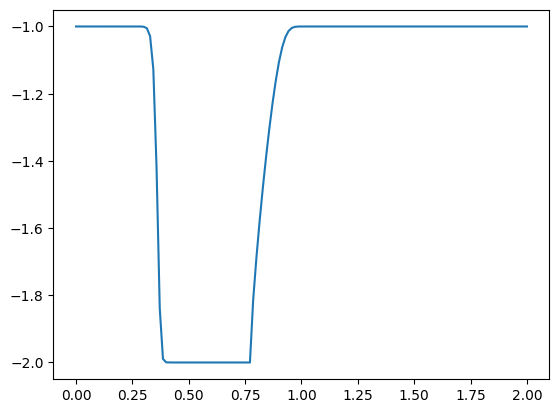

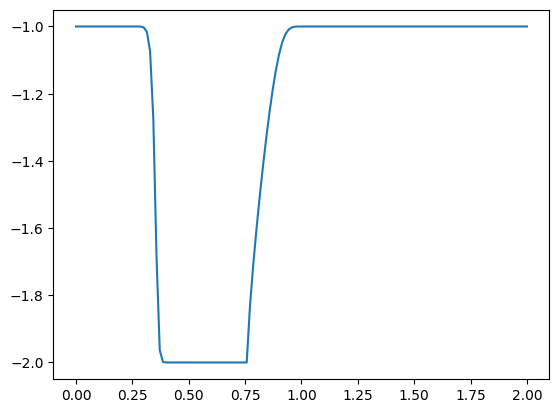

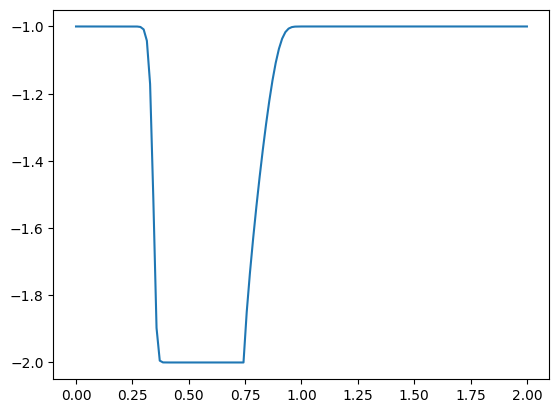

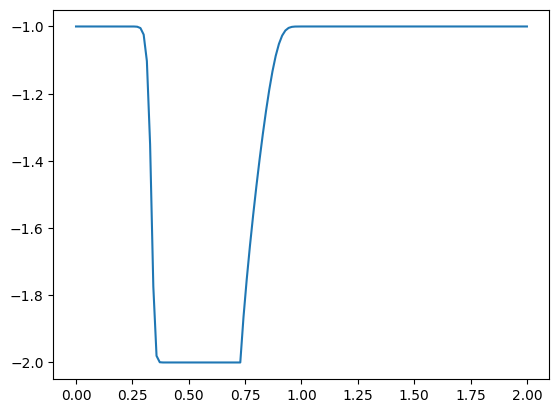

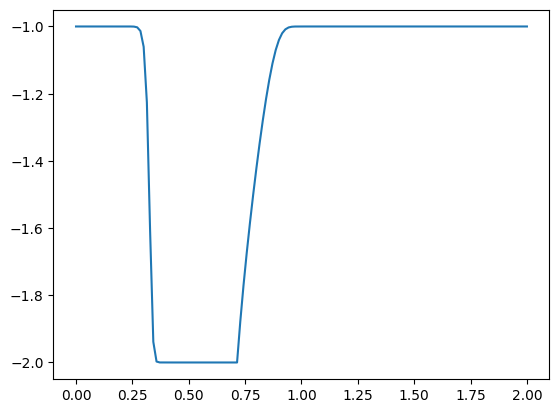

In [26]:
u[:]= -1
u[int(.5 / dx) : int(1 / dx + 1)] = -2  #then set u = 2 between 0.5 and 1 as per our I.C.s

plt.plot(np.linspace(0, 2, nx), u);
plt.show()

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    
    F = lambda c: (max(c/(abs(c)+1e-6), 0), max(-c/(abs(c)+1e-6), 0))
    
    for i in range(1, nx-1):  ##now we'll iterate through the u array
        # Coefficients to the east side of the node (i+1)
        fe1, fe2 = F(u[i])
        # Coefficients to the west side of the node (i-1)
        fw1, fw2 = F(u[i])
        # Differential values on the east side interface
        ue = un[i] * fe1 + un[i+1] * fe2
        # Differential values on the wast side interface
        uw = un[i-1] * fw1 + un[i]* fw2
        u[i] = un[i] - un[i] * dt / dx * (ue - uw)

        #u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])        
    plt.plot(np.linspace(0, 2, nx), u) ##Plot the results
    plt.show()

### Step 3: Convergence and the CFL Condition